# **Jacob Shearer - Excercise set 1**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


**Question 1:**

In [2]:
# Part (a):
print('Part a:')
print('Hello, World.')
print('\n')

# Part (b):
print('Part b:')

# i:
nineteen_billion = 19000000000
print('%e' % nineteen_billion)

# ii:
golden_mean = (np.sqrt(5) - 1) / 2
print(f'The value of the golden mean is {"%.8f" % golden_mean}')


Part a:
Hello, World.


Part b:
1.900000e+10
The value of the golden mean is 0.61803399


**Question 2:**

In [3]:
def sum(N, direction, precision):
    double = True if precision == 'double' else False
    sum = np.float32(0)
    n = 1
    if direction == "up":
        for i in range(N):
            current_term = np.float64(1/n) if double else np.float32(1/n)
            sum += np.float64(current_term) if double else np.float32(current_term)
            n += 1
    else:
        n = N
        for i in range(N):
            current_term = np.float64(1/n) if double else np.float32(1/n)
            sum += np.float64(current_term) if double else np.float32(current_term)
            n -= 1
    
    return sum


In [4]:
# Part (a):
N = 10
print('Part (a):')
s_up = sum(20, 'up', 'double')
s_down = sum(20, 'down', 'double')
print(f"s_up: {s_up}")
print(f"s_down: {s_down}")


Part (a):
s_up: 3.597739657143682
s_down: 3.597739657143682


In [5]:
# Part (b):
print('Part (b):')
print(f'Difference between s_up and s_down: {np.abs(s_up-s_down)}')
print('The fact that this value is zero indcates that the two agree to at least 15 decimal places.')
print('This is quite accurate!')


Part (b):
Difference between s_up and s_down: 0.0
The fact that this value is zero indcates that the two agree to at least 15 decimal places.
This is quite accurate!


In [6]:
# Part (c):
print('Part (c):')
exponents = [2 ,3 , 4, 5, 6, 7]
s_up_differences = np.array([])
s_down_differences = np.array([])
for p in exponents:
    print(f'For {N} to the power of {p}:')
    
    s_up_double = sum(N ** p, 'up', 'double')
    print(f'Sum with double precision: {s_up_double}')
    
    s_up_single = sum(N ** p, 'up', 'single')
    s_down_single = sum(N ** p, 'down', 'single')
    print('s_up with single precision: ' + str(s_up_single))
    print('s_down with single precision: ' + str(s_down_single))
    
    s_up_differences = np.append(s_up_differences, np.abs(np.float32(s_up_double) - s_up_single))
    s_down_differences = np.append(s_down_differences, np.abs(np.float32(s_up_double) - s_down_single))
    
    print('\n')


Part (c):
For 10 to the power of 2:
Sum with double precision: 5.187377517639621
s_up with single precision: 5.187378
s_down with single precision: 5.187377


For 10 to the power of 3:
Sum with double precision: 7.485470860550343
s_up with single precision: 7.4854784
s_down with single precision: 7.4854717


For 10 to the power of 4:
Sum with double precision: 9.787606036044348
s_up with single precision: 9.787613
s_down with single precision: 9.787604


For 10 to the power of 5:
Sum with double precision: 12.090146129863335
s_up with single precision: 12.090851
s_down with single precision: 12.090153


For 10 to the power of 6:
Sum with double precision: 14.392726722864989
s_up with single precision: 14.357358
s_down with single precision: 14.392652


For 10 to the power of 7:
Sum with double precision: 16.695311365857272
s_up with single precision: 15.403683
s_down with single precision: 16.686031




Part (d):
Difference between s_up and s_down (single) when p = 2
0.0


Difference between s_up and s_down (single) when p = 3
6.67572021484375e-06


Difference between s_up and s_down (single) when p = 4
4.76837158203125e-06


Difference between s_up and s_down (single) when p = 5
0.000698089599609375


Difference between s_up and s_down (single) when p = 6
0.0352935791015625


Difference between s_up and s_down (single) when p = 7
1.2823486328125


The fact that all of these values are positive indicates that the difference between s_up_single and s_double 
is always greater than the difference between s_down_single and s_double. This means that s_up_single is less
accurate than s_down_single.


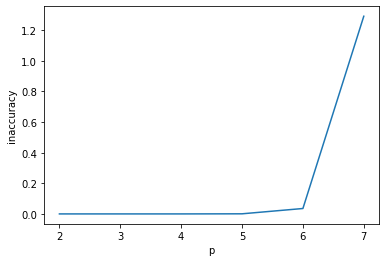

This graph has a positive slope, which indicates that the accuracy of s_up_single decreases with increasing N.


In [7]:
# Part (d):
print('Part (d):')
p = 2
for difference in (s_up_differences - s_down_differences):
    print(f'Difference between s_up and s_down (single) when p = {p}')
    print(difference)
    print('\n')
    p += 1

print('''The fact that all of these values are positive indicates that the difference between s_up_single and s_double 
is always greater than the difference between s_down_single and s_double. This means that s_up_single is less
accurate than s_down_single.''')

plt.plot(np.array(exponents), s_up_differences)
plt.xlabel('p')
plt.ylabel('inaccuracy')
plt.show()
print('This graph has a positive slope, which indicates that the accuracy of s_up_single decreases with increasing N.')


Part (e):
Floating point numbers are stored essentially in parts, with the first part (called the mantissa) corresponding to the magnitude of the number and the second part being the exponent. In order for two floating point numbers of different exponents to be added, the computer will increase the exponent of the smaller number while shifting its mantissa to the right one decimal place and adding a zero to the front. When this shift happens, the rightmost digit in the mantissa no longer has anywhere to be stored, so it is lost, which leads to a decrease in precision.

In the S<sup>up</sup> version of the algorithm, the sum quickly becomes large compared to later terms, which means that the mantissa of each successive term must be shifted more and more, which in turn truncates more and more precision. 

In the S<sup>down</sup> version of the algorithm, the exponent of the sum at any given point remains much closer to the newest term, which means that the mantissa of each successive term doesn't need to be shifted as much as with S<sup>up</sup> and thus less precision is lost.

**Question 3:**